# Credit Card Retention Analysis

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [3]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [4]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [5]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [6]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

***

## Relationships

The next thing we may be interested in is how variables move with (positively correlated) or against (negatively correlated) each other. We can do this quickly for the whole numerical dataset (or a subset) using a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) or [pairgrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid). 


This is a nice visualization since it will show relationships between each numerical variable and every other one in the dataset as well as histograms along the diagonal.

When thinking about correlation, there can be several outcomes: 

    1) Weak, strong or no correlation
    2) Positive or negative
    
Thus, you can have weak (or strong) positive, weak (or strong) negative, or no correlation. Scatter plots along with a correlation coefficient can help us understand this relationship more. 

**Remember**: Correlation does not imply causation. 

![https://commons.wikimedia.org/wiki/File:Strong--weak--no-correlation.png](../images/correlation.png "Title")

Before running our entire dataset through a pairplot, we will simplify to just the numerical data. 

In [7]:
# https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
numeric_data = data._get_numeric_data()

In [8]:
numeric_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Since this is a computationally expensive operation, and we will not gain new information from some of these variables (like CLLIENTNUM) we will simplify even further. 

In [9]:
numeric_data = data[['Credit_Limit', 'Total_Revolving_Bal', 'Months_on_book',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']]

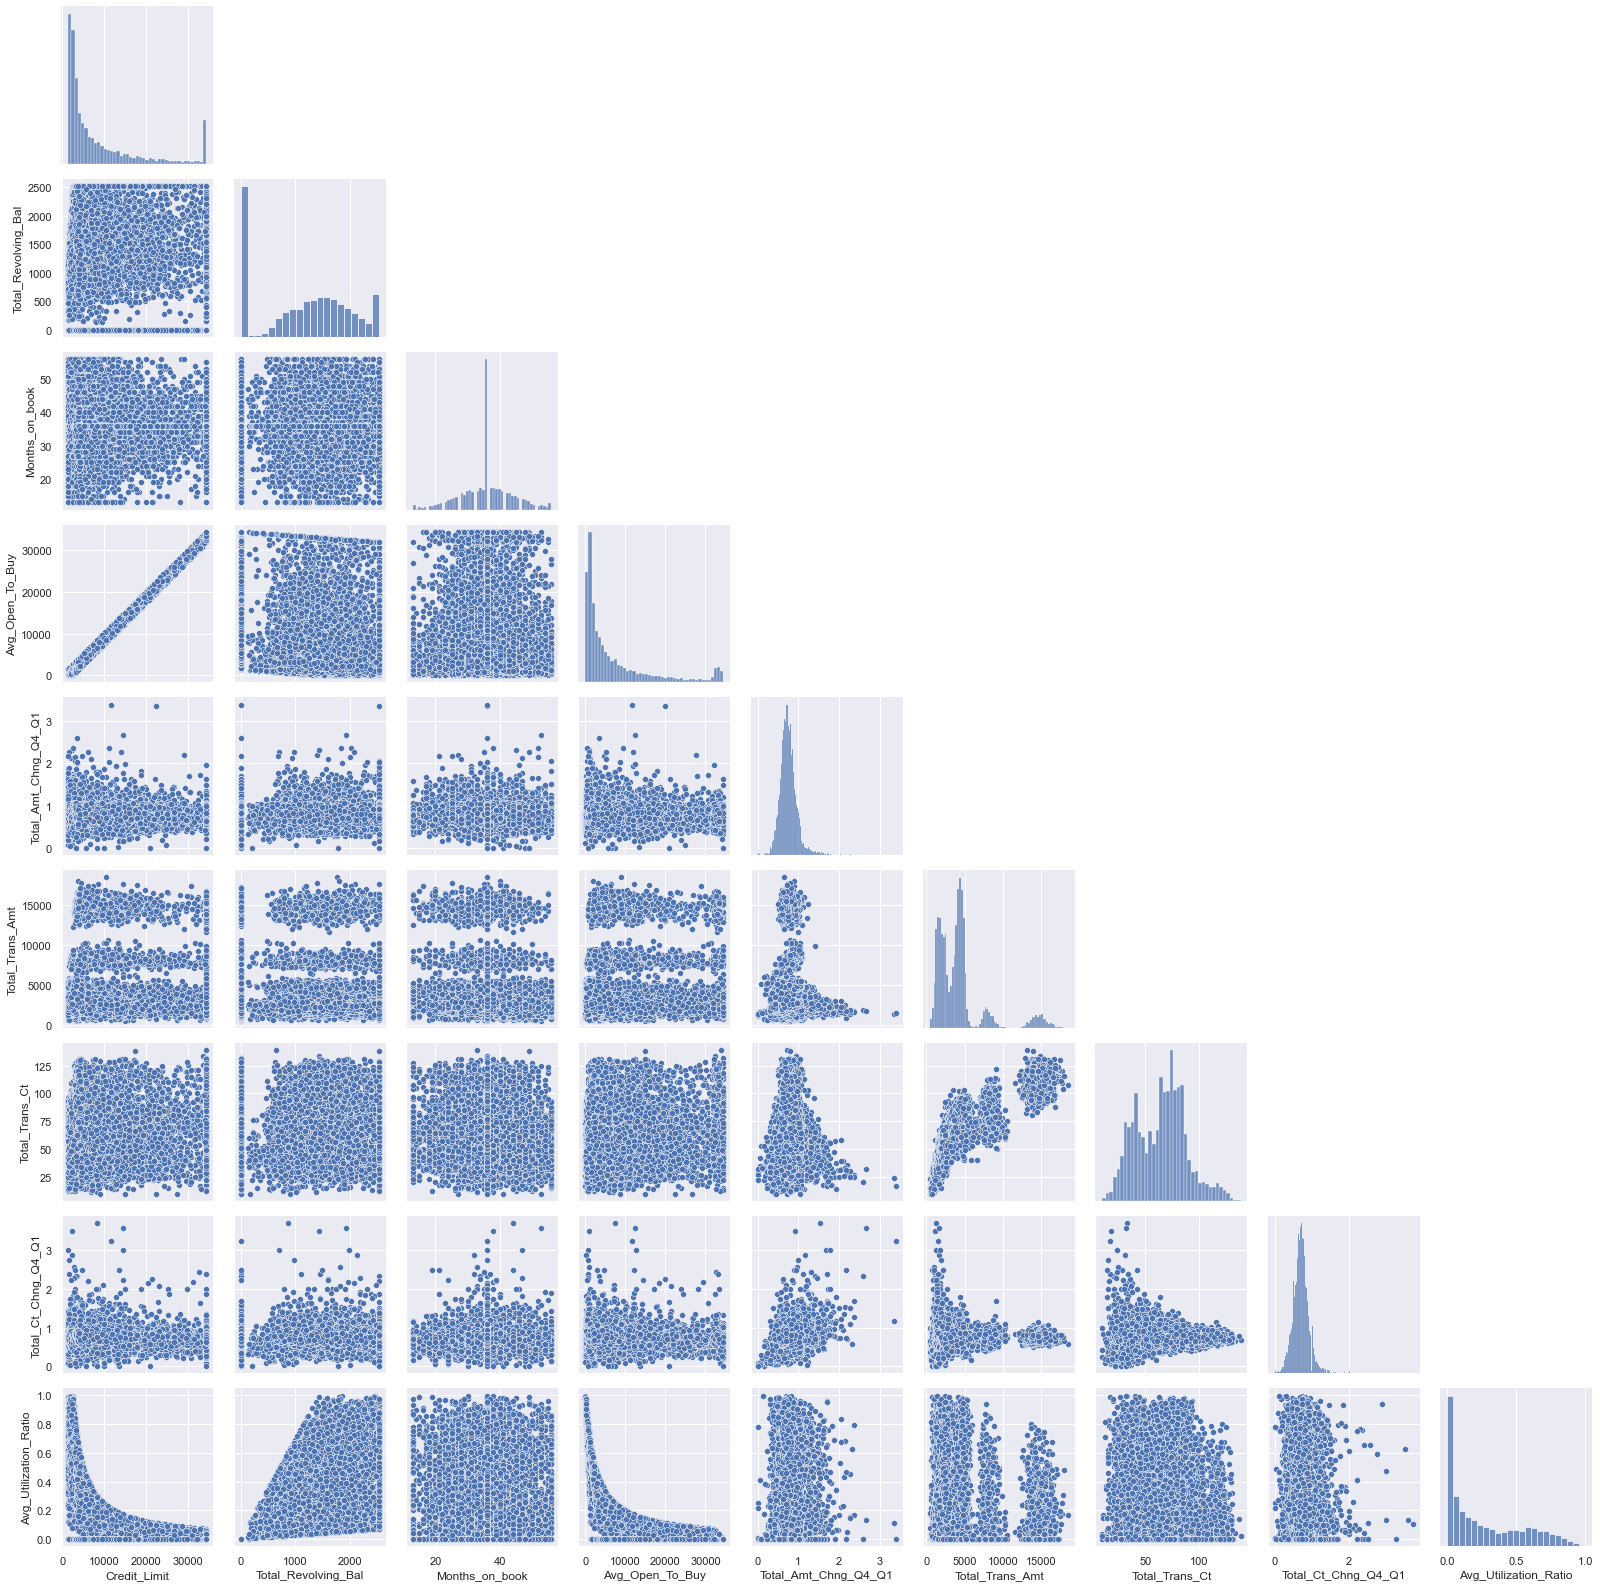

In [11]:
g = sns.PairGrid(numeric_data, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

Let's double click into one of these scatter plots that looks interesting. The one with `Total_Trans_Amt` and `Total_Trans_Ct`.

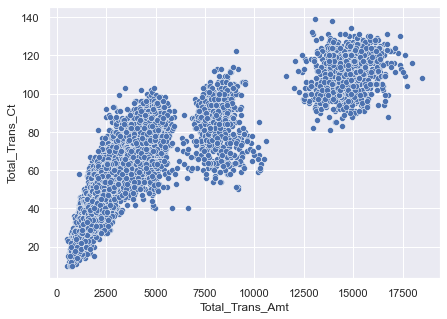

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data);

This plot clearly shows three distinct groups! Let's see if anything shows up when we add the `Attrition_Flag` as a **Hue**.

<AxesSubplot: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

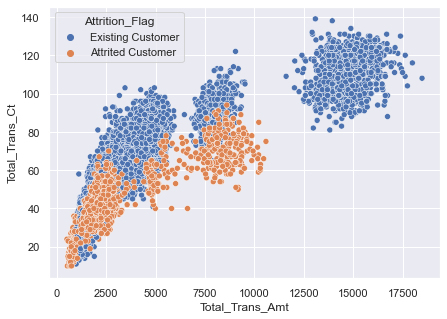

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

Looks like the top group doesn't have a single attrited customer! And that number looks to be around $11K.

**Finding #1: No attrited customer above $11K of spend**